<a href="https://colab.research.google.com/github/deutschkihun/KaggleStudy/blob/master/Medical_Appointment_No_Show_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Appointment: No Show

## A general Introduction

If you have any symptom on your body people want to visit hospital and talk with dochter.But they need a appointment to meet doctor. However according to the US Study is found that up tp 30% of patients miss their appointments, and $150 billion is lost every year 

**Reference: [US Study](https://www.scisolutions.com/uploads/news/Missed-Appts-Cost-HMT-Article-042617.pdf)**

## Source file folder
https://drive.google.com/drive/folders/1yxsEQJIwP5GC2B66rHZdBD-zyWh9EC1B?usp=sharing


## General Informations about this kernel 

**Notice** : check the information about dataset, especially column data.You can check out the data from kaggle : [Original dataset](https://www.kaggle.com/joniarroba/noshowappointments)

Strongly recommended to read out what is this dataset about and the meaning of each columns

- Summary of columns data
  1. PatientId : Identification of a patient 
  2. AppointmentID : Identification of each appointment
  3. Gender : Male or Female
  4. ScheduledDay : The day of the actuall appointment, when they have to visit the doctor.
  5. AppointmentDay : The day someone called or registered the appointment, this is before appointment of course.
  6. Age : How old is patient  
  7. Neighbourhood : Where the appointment takes place.
  8. Scholarship : True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
  9. Hipertension : True or False
  10. Diabetes: True or False 
  11. Alcoholism : True or False
  12. Handcap : True or False
  13. SMS_received : 1 or more messages sent to the patient.
  14. No-show : True or False 

## 1.Importing the prerequisite libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import warnings
warnings.filterwarnings('ignore')

## 2.load the dataset

### 2.1 read dataset

In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/No show EDA/NoshowAppointment.csv')

### 2.2 Head & Tail of dataset

In [0]:
df.head(3)

## 3. Data cleaning & Feature engineering 

### 3.1 Misssing value

In [6]:
df.isnull().any().any()
# No missing value

False

### 3.2 Duplication 

In [7]:
df.duplicated().sum()
# No duplication 

0

### 3.3 Incorrect datatype

In [8]:
df.info()
# wrong type of data: ScheduledDay,AppointmentDay

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [0]:
## Converting the date information in string to datetime type:
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)

### 3.4 change the column name

 - Hipertension is spanisch -> in english called **Hypertension**
 - Handcap -> **Handicap**
 

In [0]:
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace = True)

### 3.5 Statistical Error

In [0]:
df.describe()

In [13]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [0]:
df.drop([99832],inplace=True)

### 3.6 Age of Infant

In [15]:
df[df['Age']==0].shape

(3539, 14)

In [16]:
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


Observation 

> There 3539 patients who are 0 years old.These are small infant with few months of Age. In the normal case they don't have `Diabetes`,`Hipertension` and `Alcoholism`. And then we check that these are infant.(No case of Infant with `Diabetes`,`Hipertension` or `Alcoholism`)

### 3.7 Unique value of Neighborhood

In [17]:
print("Unique Values of `Neighbourhood`:{}"
      .format(np.sort(df.Neighbourhood.unique())))

Unique Values of `Neighbourhood`:['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SANTA LÚ

### 3.8 Waiting Time

In [0]:
#df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])

# Get the Waiting Time in Days of the Patients.
df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days

**Notice**

There are exceptions that waiting times are negative.That mean scheduledDay was earlier than Appointment day.We need to remove it

In [0]:
Negative = df[df['Waiting_Time_days'] < 0].index
df.drop(Negative, inplace=True)

### 3.9 Split show vs Noshow

In [0]:
df2 = df[df['No-show']=='Yes']
df2.to_csv('only_Noshow.csv',index=False)

# <a name="eda"></a> 4. Exploratory Data Analysis

### 4.1 No Show vs Show with pie-chart 

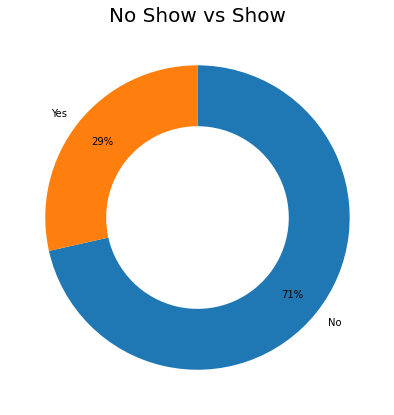

In [23]:
plt.figure(figsize=(17,7)) 
sorted_counts = df['No-show'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');

plt.title('No Show vs Show',fontsize=20);

Observation 

> No Show: 20%  vs  Show: 80%

### 4.2 Gender Comparision only with no show

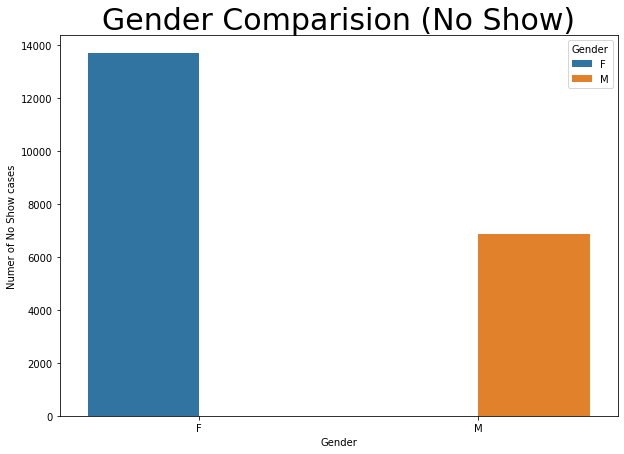

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(x='Gender',data=df2,hue='Gender')
plt.title("Gender comparision (No Show)".title(),fontsize=30)
plt.ylabel('Numer of No Show cases');

Observation 

> Female > Male 

### 4.3 No show rate of differrent gender

In [25]:
df.groupby(['Gender','No-show'])['No-show'].count()

Gender  No-show
F       No         34396
        Yes        13674
M       No         17041
        Yes         6848
Name: No-show, dtype: int64

In [26]:
a = (df.groupby(['Gender','No-show'])['No-show'].count()[1] / sum(df.groupby(['Gender','No-show'])['No-show'].count()[0:2]))
print("The rate of female's no show is "+"{:.2f}".format(a*100)+'%')
b = (df.groupby(['Gender','No-show'])['No-show'].count()[3] / sum(df.groupby(['Gender','No-show'])['No-show'].count()[2:4]))
print("The rate of male's no show is "+"{:.2f}".format(b*100)+'%')

The rate of female's no show is 28.45%
The rate of male's no show is 28.67%


Observation

> Gender is not a important fator of No show appointment.Because the rate of different gender shows very similar values.

### 4.4 Age histogram

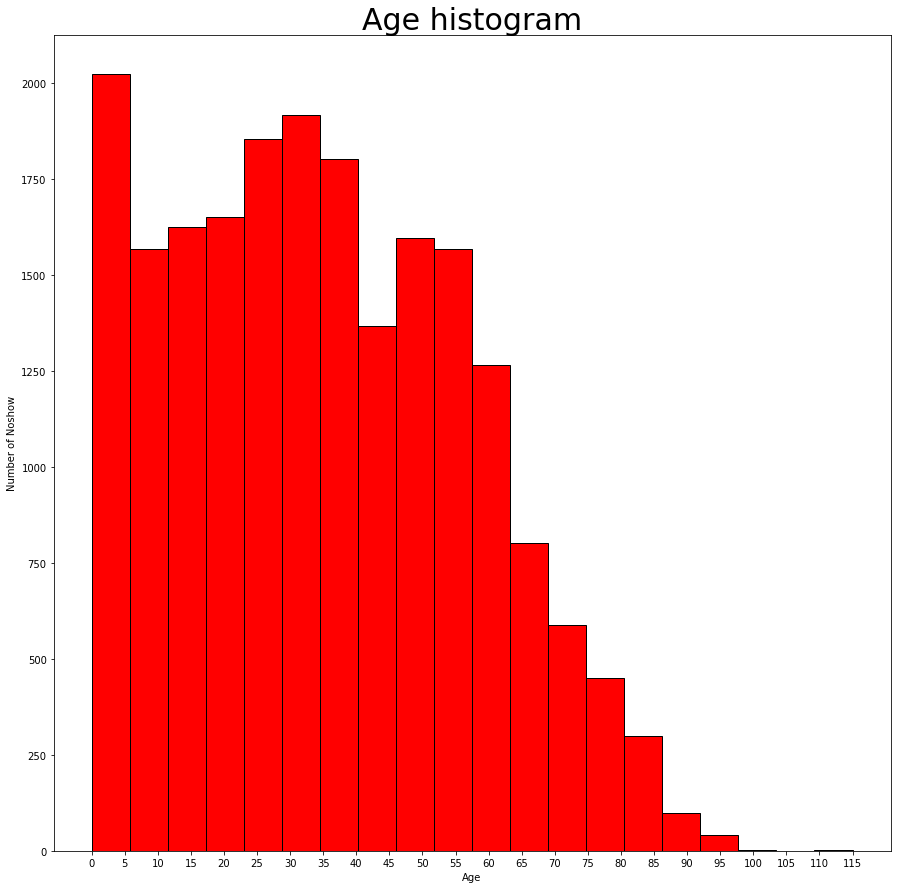

In [31]:
plt.subplots(figsize=(15,15))
plt.hist(x='Age',bins=20,data=df2,edgecolor='black',color='red')
plt.title('Age histogram',fontsize=30)
plt.xlabel('Age')
plt.ylabel('Number of Noshow')
x1 = list(range(0,120,5))
plt.xticks(x1);

Observation 

> Age interval from 0 to 5 shows the highst number of no show cases.This is because of parent.Age from 0 to 5 can't visit hospital without next of kin(NOK)

### 4.5 Age histogram with different Gender

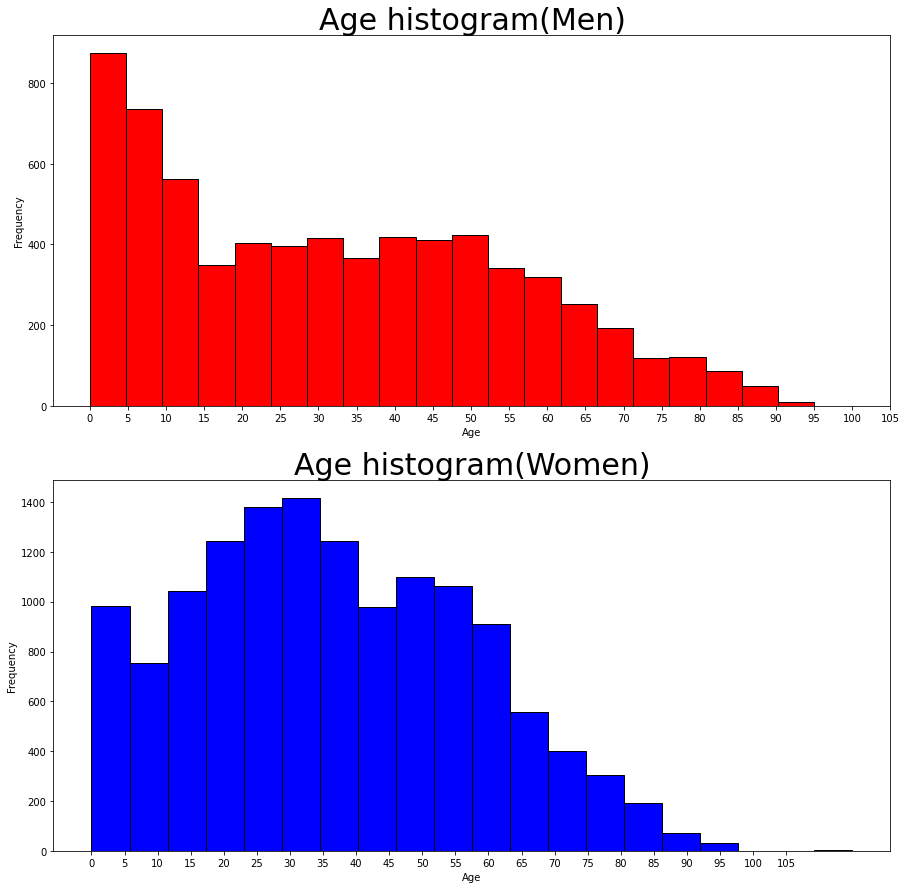

In [32]:
f,ax=plt.subplots(2,1,figsize=(15,15))
df2[df2['Gender']=='M'].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Age histogram(Men)',fontsize=30)
ax[0].set_xlabel('Age')
x1=list(range(0,110,5))
ax[0].set_xticks(x1)
df2[df2['Gender']=='F'].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='blue')
ax[1].set_title('Age histogram(Women)',fontsize=30)
ax[1].set_xlabel('Age')
x2=list(range(0,110,5))
ax[1].set_xticks(x2);

Observation 

> both histograms show right skewed distribution

### 4.6 No Show with Time 

In [33]:
df2['Hour'] = pd.to_datetime(df2['ScheduledDay']).dt.hour
df2['Minute'] = pd.to_datetime(df2['ScheduledDay']).dt.minute
df2['Second'] = pd.to_datetime(df2['ScheduledDay']).dt.second
df2['Count'] = 1
df2.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_Time_days,Hour,Minute,Second,Count
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,15,5,12,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,15,39,58,1
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,2,8,44,12,1
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes,0,9,28,57,1
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,1,7,51,14,1


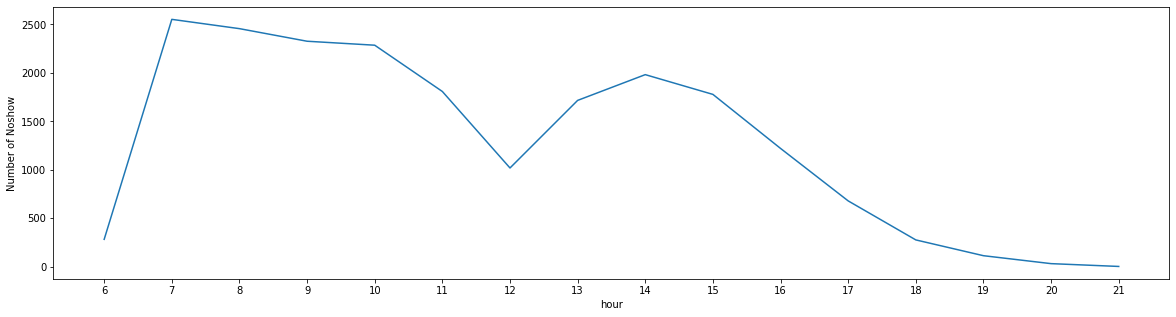

In [34]:
keys = [pair for pair, df2 in df2.groupby(['Hour'])]

plt.figure(figsize=(20,5))
plt.plot(keys, df2.groupby(['Hour']).count()['Count'])
plt.xlabel('hour')
plt.ylabel('Number of Noshow')
plt.xticks(keys);

Observation 

> High no show cases in the morning (7am to 10am). Probably because of the morning they want to sleep more rather show up appointment

### 4.7 Noshow with Receiving SMS

In [0]:
No_show_Adult = df2[df2['Age']>=18]

Considering the Age over 18. Assumed not all minor have a cell phone.So it's not considered in this visualization.

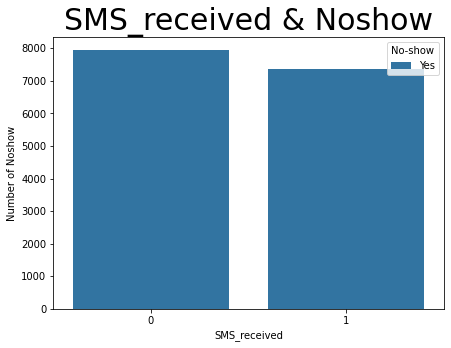

In [36]:
plt.figure(figsize=(7,5))
sns.countplot(x='SMS_received',hue='No-show',data=No_show_Adult)
plt.title("SMS_received & Noshow",fontsize=30)
plt.ylabel('Number of Noshow');

Observation

> Receiving SMS is not a crucial factor of determininig No-show. As you can see above there are a lot of cases that they didn't show up their medical appointment even they received a message from hospital or doctor.

### 4.8 No show with Neighborhood 

#### 4.8.1 No show counting with Neighbourhood

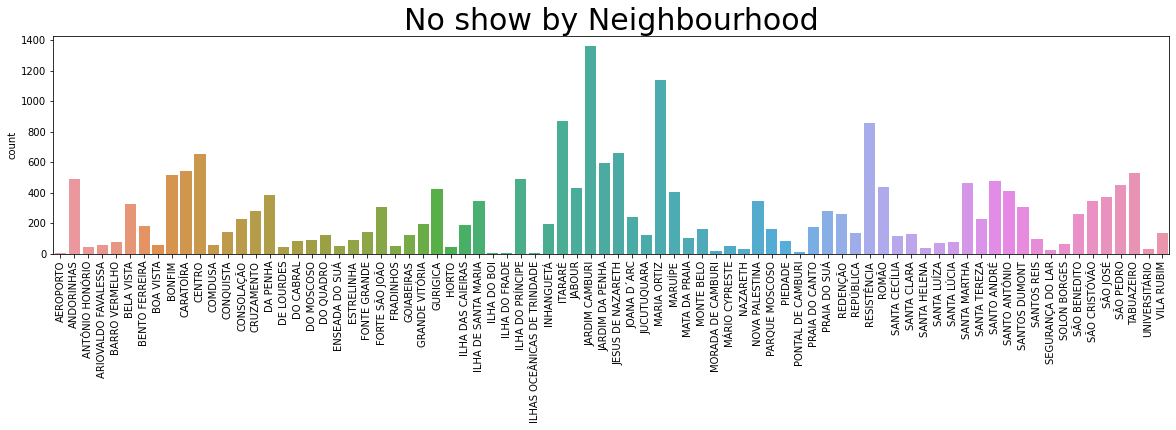

In [37]:
plt.figure(figsize=(20,4))
plt.xticks(rotation='vertical')
ax = sns.countplot(x=np.sort(df2.Neighbourhood))
ax.set_title("No show by Neighbourhood",fontsize=30);

#### 4.8.2 No show rate with Neighbourhood

In [0]:
 RateNeighbourhood = df[df['No-show']=='No'].groupby(['Neighbourhood']).size() / df.groupby(['Neighbourhood']).size() 

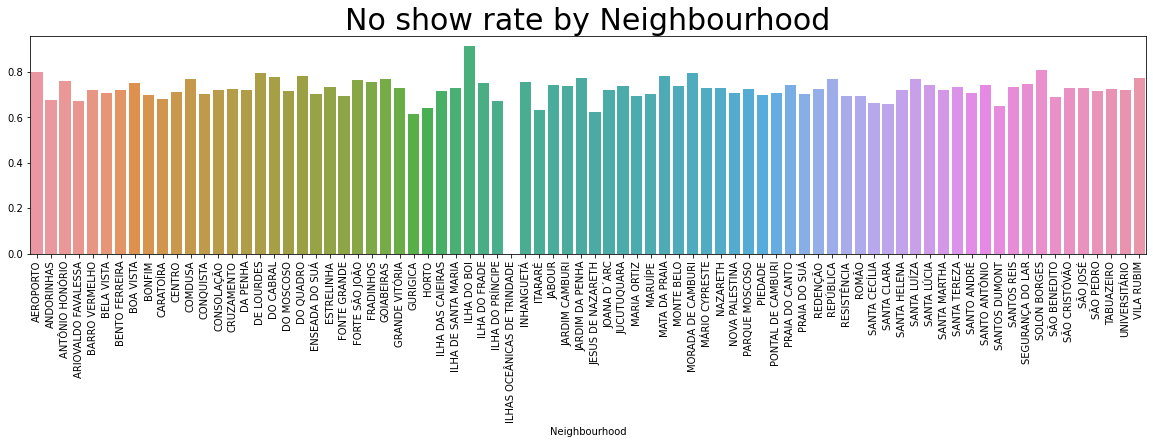

In [39]:
plt.figure(figsize=(20,4))
plt.xticks(rotation='vertical')
sns.barplot(x=RateNeighbourhood.index,y=RateNeighbourhood)
plt.title("No show rate by Neighbourhood",fontsize=30);

Observation 

> Rate of No show by neighbourhood are almost same.

### 4.9 No show with Hypertension

#### 4.9.1 No show counting by Hypertension

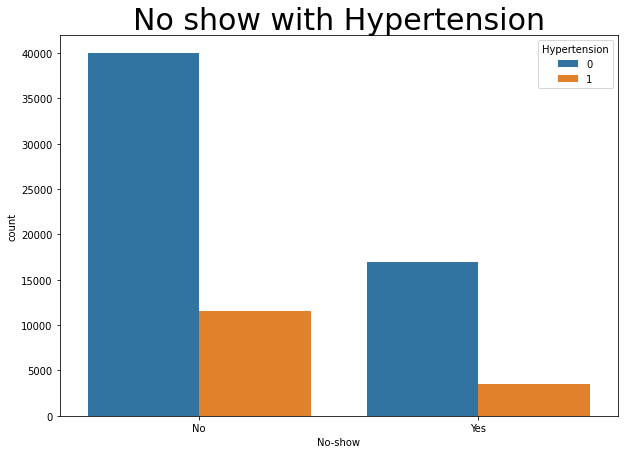

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='No-show',hue='Hypertension')
plt.title("No show with Hypertension",fontsize=30);

#### 4.9.2 No show rate with Hypertension

In [0]:
 RateHypertension = df[df['No-show']=='No'].groupby(['Hypertension']).size() / df.groupby(['Hypertension']).size() 

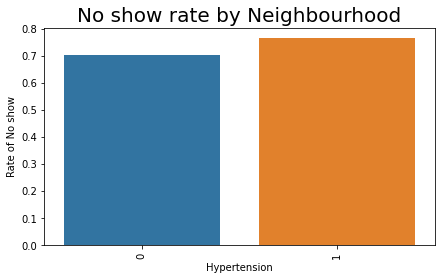

In [42]:
plt.figure(figsize=(7,4))
plt.xticks(rotation='vertical')
sns.barplot(x=RateHypertension.index,y=RateHypertension)

plt.title("No show rate by Neighbourhood",fontsize=20)
plt.ylabel("Rate of No show");

### 4.10 No show with Handicap 

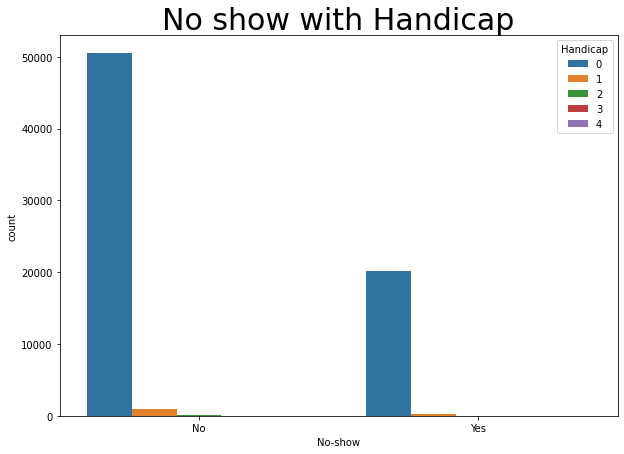

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='No-show',hue='Handicap')
plt.title("No show with Handicap",fontsize=30);

In [0]:
 RateHandicap = df[df['No-show']=='No'].groupby(['Handicap']).size() / df.groupby(['Handicap']).size() 

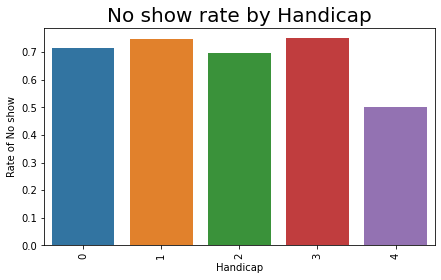

In [45]:
plt.figure(figsize=(7,4))
plt.xticks(rotation='vertical')
sns.barplot(x=RateHandicap.index,y=RateHandicap)
plt.title("No show rate by Handicap",fontsize=20)
plt.ylabel("Rate of No show");

### 4.12 No show with Waiting Time days

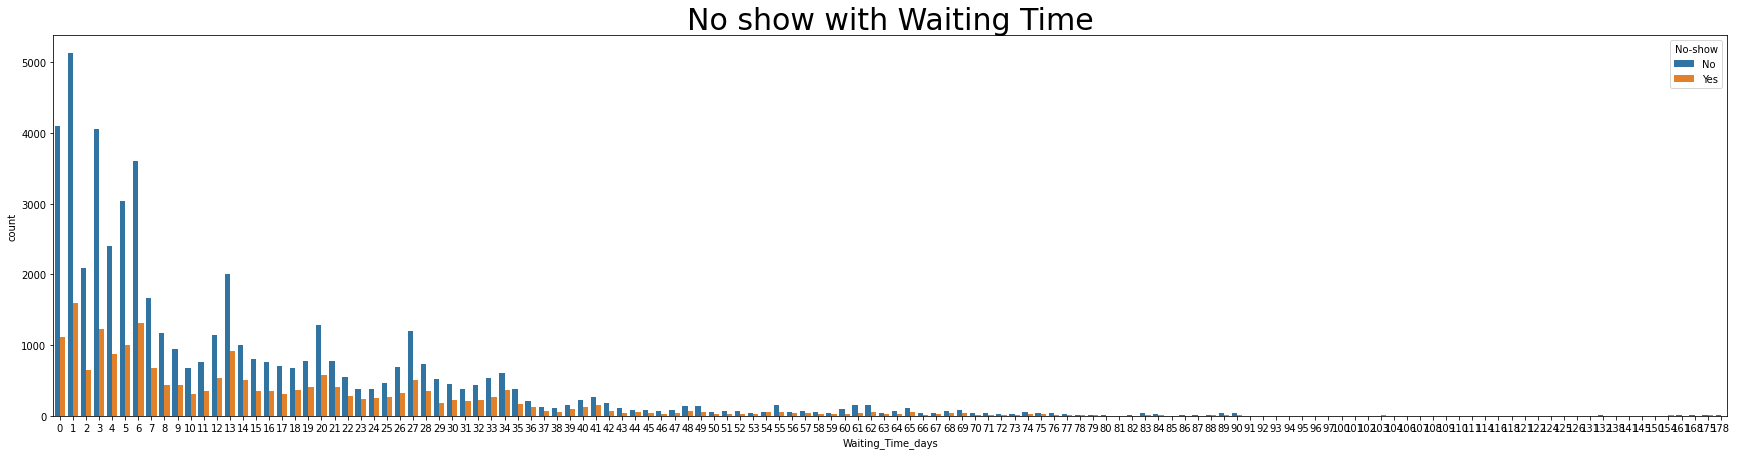

In [46]:
plt.figure(figsize=(30,7))
sns.countplot(data=df,x='Waiting_Time_days',hue='No-show')
plt.title("No show with Waiting Time",fontsize=30);

In [0]:
 RateWaitingTimeDay = df[df['No-show']=='No'].groupby(['Waiting_Time_days']).size() / df.groupby(['Waiting_Time_days']).size() 

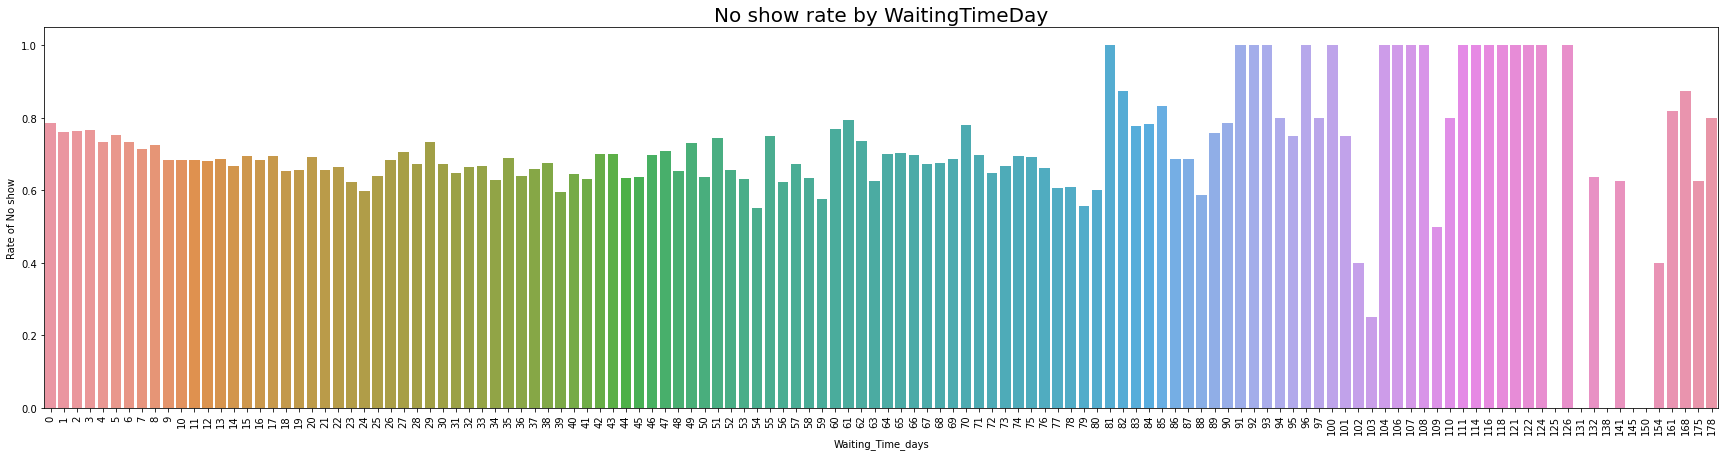

In [48]:
plt.figure(figsize=(30,7))
plt.xticks(rotation='vertical')
sns.barplot(x=RateWaitingTimeDay.index,y=RateWaitingTimeDay)
plt.title("No show rate by WaitingTimeDay",fontsize=20)
plt.ylabel("Rate of No show");

### 4.12 Correlation matrix of factors 

In [0]:
df.replace({'Yes':1, 'No': 0},inplace=True)
# In order to get a correation in number we need to conver into numeric value

In [0]:
c= df.corr()
mask = np.triu(np.ones_like(c, dtype=np.bool))

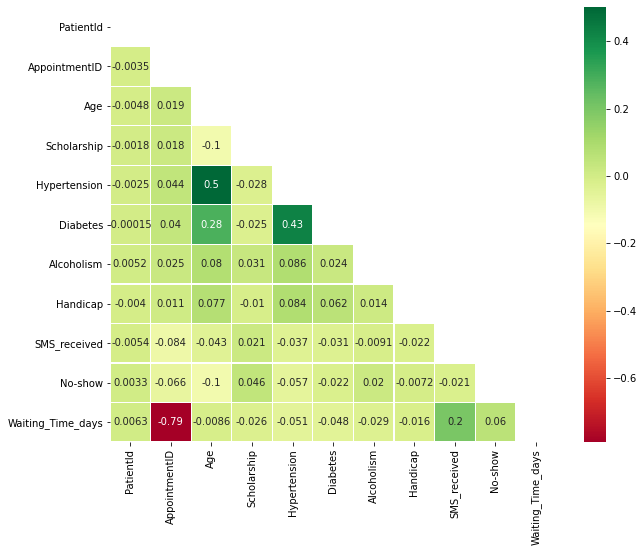

In [51]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,mask=mask) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)